In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import os
import pingouin
import datapungibea as dpb
from matplotlib.patches import ArrowStyle
import copy
from matplotlib.backends.backend_pdf import PdfPages
import networkx as nx
from pgmpy.estimators import PC
import statsmodels.api as sm
import plotly.express as px
from sklearn.linear_model import LinearRegression
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score
from statsmodels.discrete.discrete_model import Logit
from networkx.drawing.nx_agraph import graphviz_layout
from collections import defaultdict
import math

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:
# nominal.to_csv('nominal.csv', index=True)
# diff_nominal.to_csv('diff_nominal.csv', index=True)
# real.to_csv('real.csv', index=True)
# diff_real.to_csv('diff_real.csv', index=True)

In [41]:
ai_data_nominal = pd.read_csv('nominal_data.csv')

In [42]:
ai_data_real = pd.read_csv('real_data.csv')

In [43]:
ai_data_nominal = ai_data_nominal.set_index(['FIPS_y', 'TimePeriod'])

In [44]:
ai_data_real = ai_data_real.set_index(['FIPS_y', 'TimePeriod'])

In [45]:
exclude_vars = ['M4 I','RM4I', 'unem']  # List of variables to exclude

# Create a dictionary to store the dataframes
ai_dct = {"logged_n": ai_data_nominal.copy(), "logged_r": ai_data_real.copy(), 
          "rates_n": ai_data_nominal.copy(), "rates_r": ai_data_real.copy(),
         "percent rates_n": ai_data_nominal.copy(), 
          "percent rates_r": ai_data_real.copy()}

        
for col in ai_dct['logged_n'].columns:
    if col not in exclude_vars:
        ai_dct["logged_n"][col] = np.log(ai_data_nominal[col]).replace([np.inf, -np.inf], np.nan)

for col in ai_dct['logged_r'].columns:
    if col not in exclude_vars:
        ai_dct["logged_r"][col] = np.log(ai_data_real[col]).replace([np.inf, -np.inf], np.nan)

        
for col in ai_dct['rates_n'].columns:
    if col not in exclude_vars:
        ai_dct["rates_n"][col] = ai_dct["logged_n"].groupby('FIPS_y')[col].diff().dropna()
        
        
for col in ai_dct['rates_r'].columns:
    if col not in exclude_vars:
        ai_dct["rates_r"][col] = ai_dct["logged_r"].groupby('FIPS_y')[col].diff().dropna()

        
for col in ai_dct['percent rates_n'].columns:
    if col not in exclude_vars:
        ai_dct["percent rates_n"][col] = ai_dct["rates_n"].groupby('FIPS_y')[col].diff().dropna()

        
        
for col in ai_dct['percent rates_r'].columns:
    if col not in exclude_vars:
        ai_dct["percent rates_r"][col] = ai_dct["rates_r"].groupby('FIPS_y')[col].diff().dropna()

        
        

/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/abiodun.idowu/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
nominal = ai_dct['rates_n']

In [47]:
nominal.drop(columns=['All ', 'Neig'], inplace=True)

In [9]:
diff_nominal = ai_dct['percent rates_n']

In [49]:
diff_nominal.drop(columns=['All ', 'Neig'], inplace=True)

In [10]:
real = ai_dct['rates_r']

In [50]:
real.drop(columns=['All ', 'Neig'], inplace=True)

In [11]:
diff_real = ai_dct['percent rates_r']

In [52]:
diff_real.drop(columns=['All ', 'Neig'], inplace=True)

In [54]:
ai_df_nom = pd.read_csv('nominal_kml3d.csv')

ai_df_diffnom = pd.read_csv('diff_nominal_kml3d.csv')

ai_df_real = pd.read_csv('real_kml3d.csv')

ai_df_diffreal = pd.read_csv('diff_real_kml3d.csv')

In [55]:
level_11 = ai_df_nom

level_12 = ai_df_diffnom

level_21 = ai_df_real

level_22 = ai_df_diffreal

In [56]:
dfg_ai11 = nominal.dropna()

dfg_ai12 = diff_nominal.dropna()

dfg_ai21 = real.dropna()

dfg_ai22 = diff_real.dropna()

In [57]:
ai_merge11 = pd.merge(dfg_ai11, level_11[['FIPS_y', 'clusters']], on='FIPS_y', how='left')

In [58]:
ai_merge12 = pd.merge(dfg_ai12, level_12[['FIPS_y', 'clusters']], on='FIPS_y', how='left')

In [59]:
ai_merge21 = pd.merge(dfg_ai21, level_21[['FIPS_y', 'clusters']], on='FIPS_y', how='left')

In [60]:
ai_merge22 = pd.merge(dfg_ai22, level_22[['FIPS_y', 'clusters']], on='FIPS_y', how='left')

In [61]:
kml3d_ai_level11 = ai_merge11.dropna()

In [62]:
kml3d_ai_level12 = ai_merge12.dropna()

In [63]:
kml3d_ai_level21 = ai_merge21.dropna()

In [64]:
kml3d_ai_level22 = ai_merge22.dropna()

In [65]:
kml3d_ai_level11 = kml3d_ai_level11.set_index(['FIPS_y'])

In [66]:
kml3d_ai_level12 = kml3d_ai_level12.set_index(['FIPS_y'])

In [67]:
kml3d_ai_level21 = kml3d_ai_level21.set_index(['FIPS_y'])

In [68]:
kml3d_ai_level22 = kml3d_ai_level22.set_index(['FIPS_y'])

In [69]:
cluster_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}

In [70]:
kml3d_ai_level11['clusters'].replace(cluster_mapping, inplace=True)

In [71]:
kml3d_ai_level12['clusters'].replace(cluster_mapping, inplace=True)

In [72]:
kml3d_ai_level21['clusters'].replace(cluster_mapping, inplace=True)

In [73]:
kml3d_ai_level22['clusters'].replace(cluster_mapping, inplace=True)

In [74]:
plot_df1 = nominal.dropna()
plot_df2 = diff_nominal.dropna()
plot_df3 = real.dropna()
plot_df4 = diff_real.dropna()

In [75]:
# Assuming 'plot_df1', 'plot_df2', and 'plot_df3' are your three dataframes

# Define a function to plot a DAG
def graph_DAG(edges, df, title=""):
    graph = nx.Graph()
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        controls = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print('keep control:', control)
                keep_controls.append(control)
        print(edge, keep_controls)
        pcorr = df[[edge[0], edge[1]] + keep_controls].pcorr()
        edge_labels[edge] = str(round(pcorr[edge[0]].loc[edge[1]], 2))
    graph.add_edges_from(edges)
    color_map = ['C0' for _ in graph]

    fig, ax = plt.subplots(figsize=(20, 12))
    plt.tight_layout()
    pos = graphviz_layout(graph, "neato", None)

    plt.title(title, fontsize=30)
    nx.draw_networkx(graph, pos, node_color=color_map, node_size=1200, with_labels=True,
                      arrows=True, font_color='k', font_size=26, alpha=1, width=1,
                      edge_color='C1',
                      arrowstyle=ArrowStyle('Fancy, head_length=3, head_width=1.5, tail_width=.1'), ax=ax)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='green', font_size=20)


  0%|          | 0/4 [00:00<?, ?it/s]

keep control: Util
keep control: M4_y
('Mini', 'unem') ['Util', 'M4_y']
('unem', 'M4 I') []
keep control: Util
('M4 I', 'M4_y') ['Util']
('M4 I', 'Mini') []
keep control: Util
keep control: Mini
('M4_y', 'unem') ['Util', 'Mini']
keep control: M4 I
('Util', 'M4_y') ['M4 I']
keep control: M4_y
keep control: Mini
('Util', 'unem') ['M4_y', 'Mini']


  0%|          | 0/4 [00:00<?, ?it/s]

keep control: Agri
keep control: Mini
('unem', 'M4 I') ['Agri', 'Mini']
keep control: Util
keep control: M4 I
keep control: Agri
keep control: Mini
('unem', 'M4_y') ['Util', 'M4 I', 'Agri', 'Mini']
keep control: Util
keep control: unem
keep control: Agri
keep control: Mini
('M4 I', 'M4_y') ['Util', 'unem', 'Agri', 'Mini']
keep control: Util
keep control: M4 I
keep control: unem
keep control: Mini
('Agri', 'M4_y') ['Util', 'M4 I', 'unem', 'Mini']
keep control: unem
keep control: Mini
('Agri', 'M4 I') ['unem', 'Mini']
keep control: M4 I
keep control: Agri
keep control: unem
keep control: Mini
('Util', 'M4_y') ['M4 I', 'Agri', 'unem', 'Mini']
keep control: unem
keep control: Agri
('Mini', 'M4 I') ['unem', 'Agri']
keep control: Util
keep control: M4 I
keep control: Agri
keep control: unem
('Mini', 'M4_y') ['Util', 'M4 I', 'Agri', 'unem']


  0%|          | 0/4 [00:00<?, ?it/s]

keep control: Util
keep control: RM4_
('unem', 'RM4I') ['Util', 'RM4_']
keep control: RM4_
keep control: unem
('Util', 'RM4I') ['RM4_', 'unem']
keep control: Agri
keep control: Mini
('Util', 'RM4_') ['Agri', 'Mini']
keep control: Util
keep control: unem
('RM4_', 'RM4I') ['Util', 'unem']
('RM4_', 'Util') []
('RM4_', 'Agri') []
('RM4_', 'Mini') []
keep control: Util
keep control: Mini
('Agri', 'RM4_') ['Util', 'Mini']
keep control: Util
keep control: Agri
('Mini', 'RM4_') ['Util', 'Agri']


  0%|          | 0/4 [00:00<?, ?it/s]

keep control: RM4_
('unem', 'RM4I') ['RM4_']
keep control: unem
('RM4_', 'RM4I') ['unem']
('RM4_', 'Util') []
('RM4_', 'Agri') []
('RM4_', 'Mini') []
keep control: Agri
keep control: Mini
('Util', 'RM4_') ['Agri', 'Mini']
keep control: Util
keep control: Mini
('Agri', 'RM4_') ['Util', 'Mini']
keep control: Util
keep control: Agri
('Mini', 'RM4_') ['Util', 'Agri']


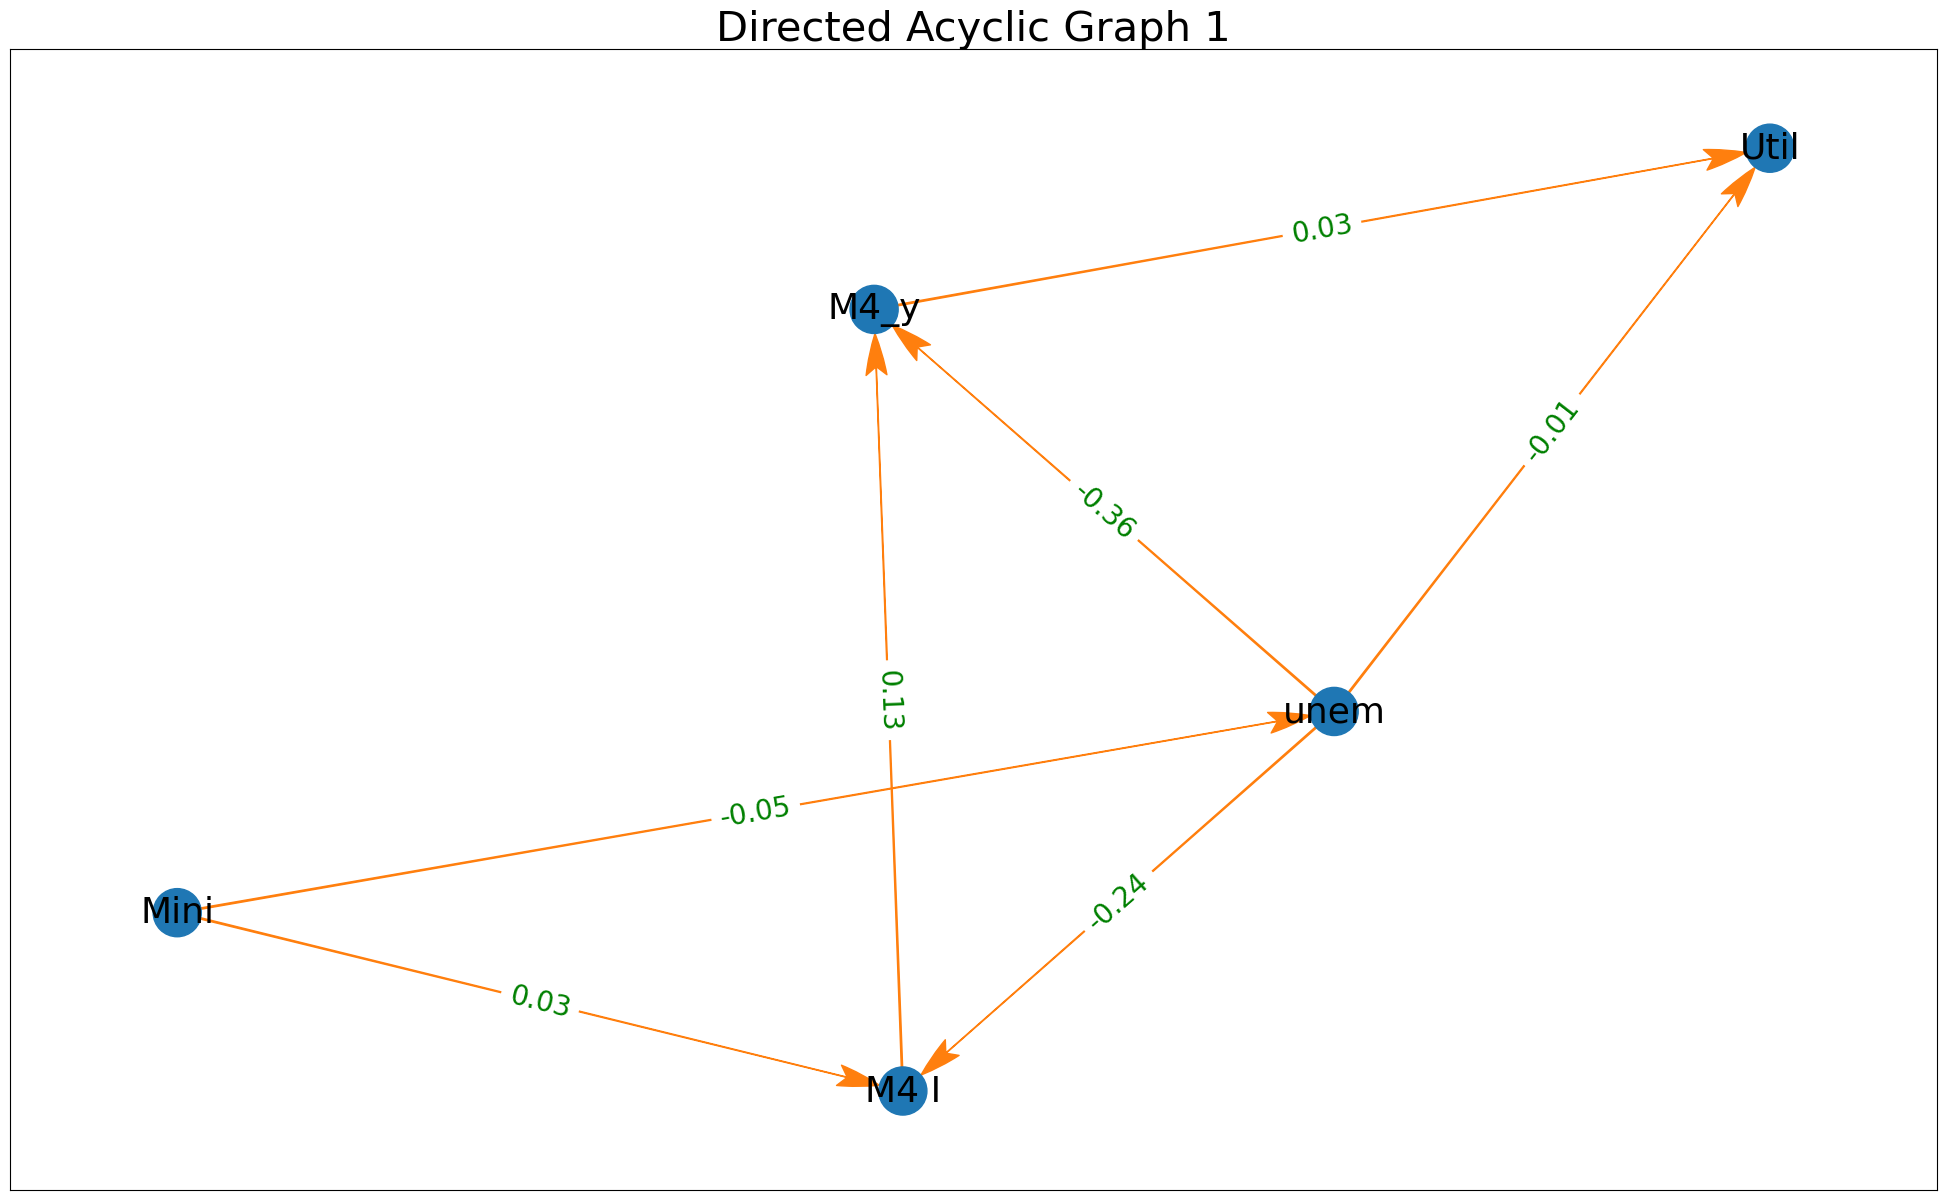

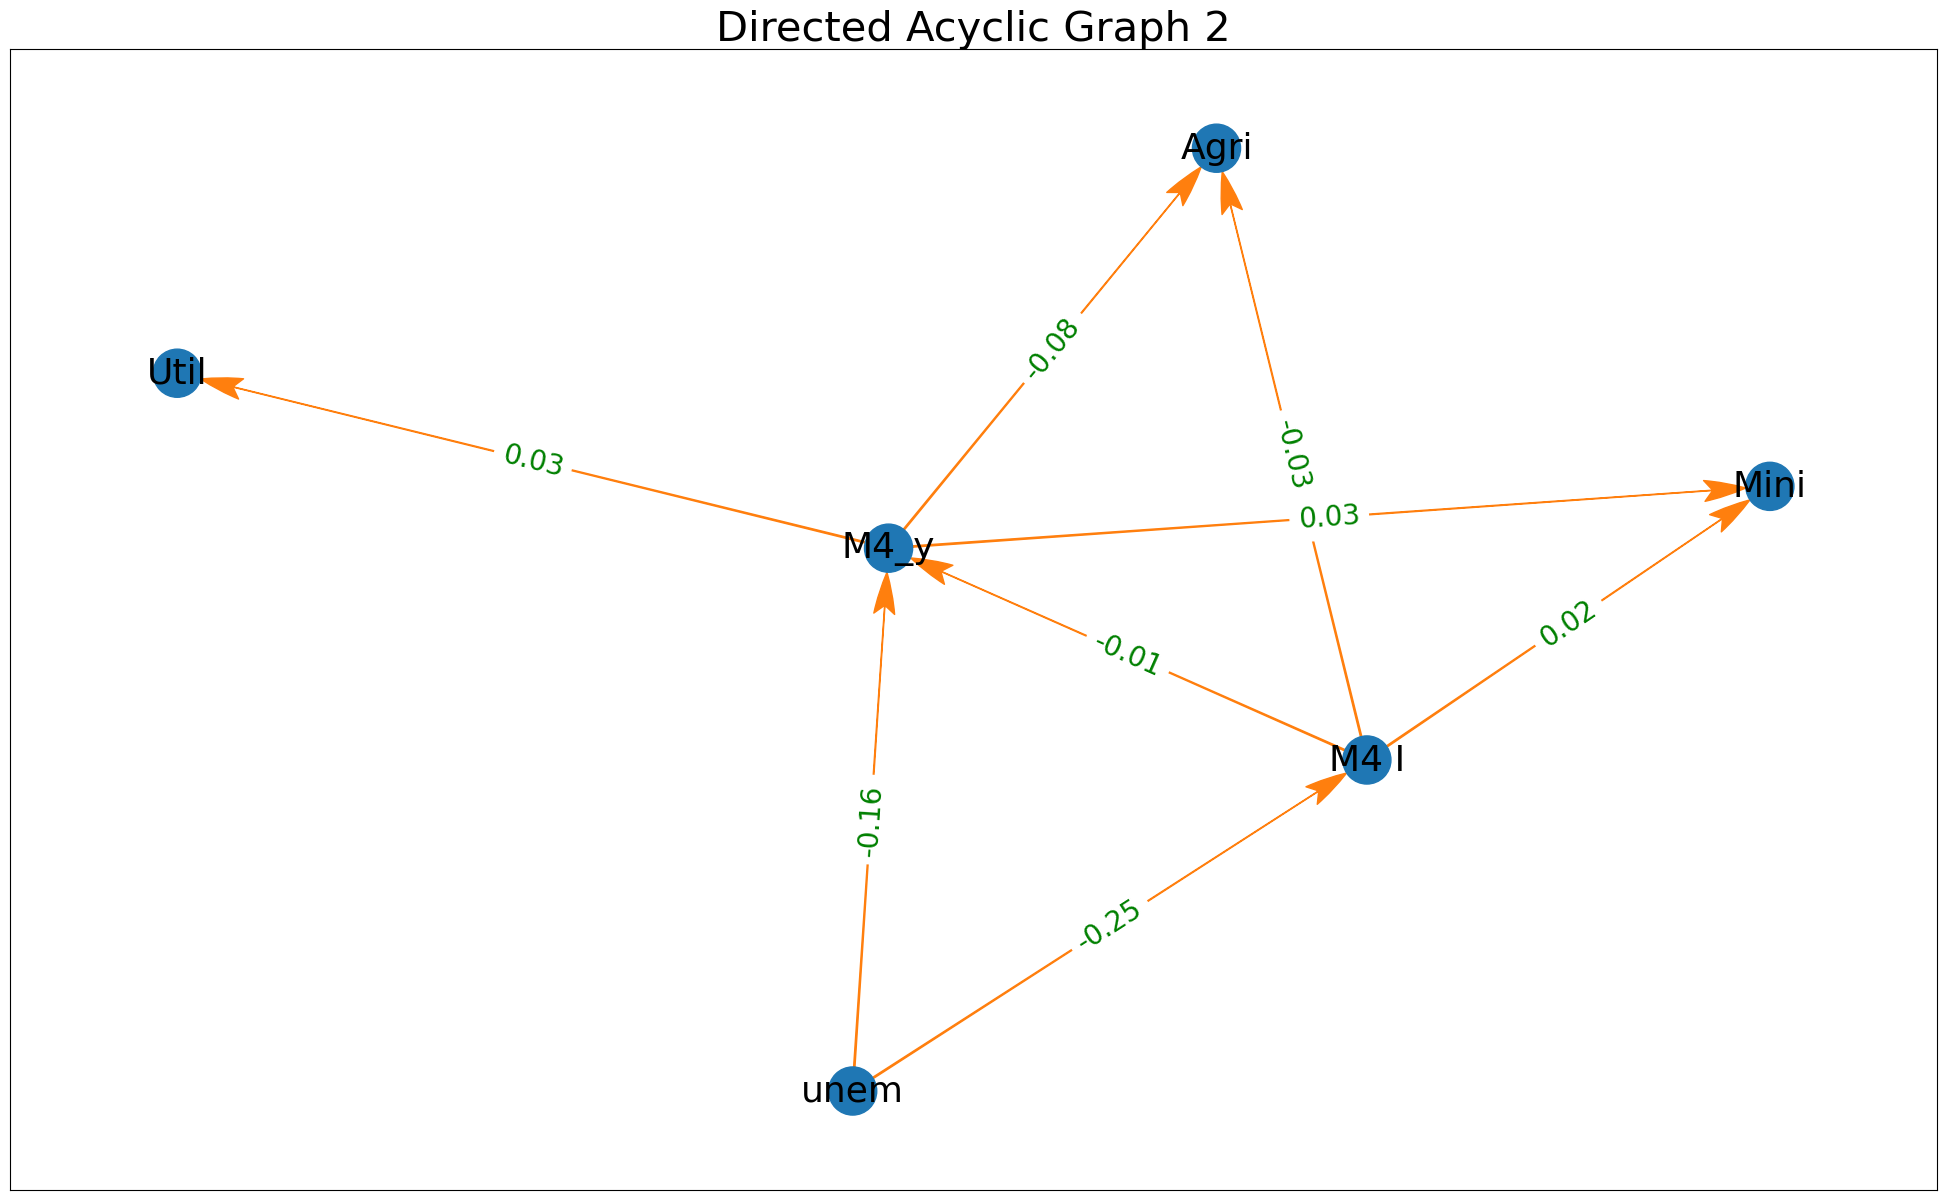

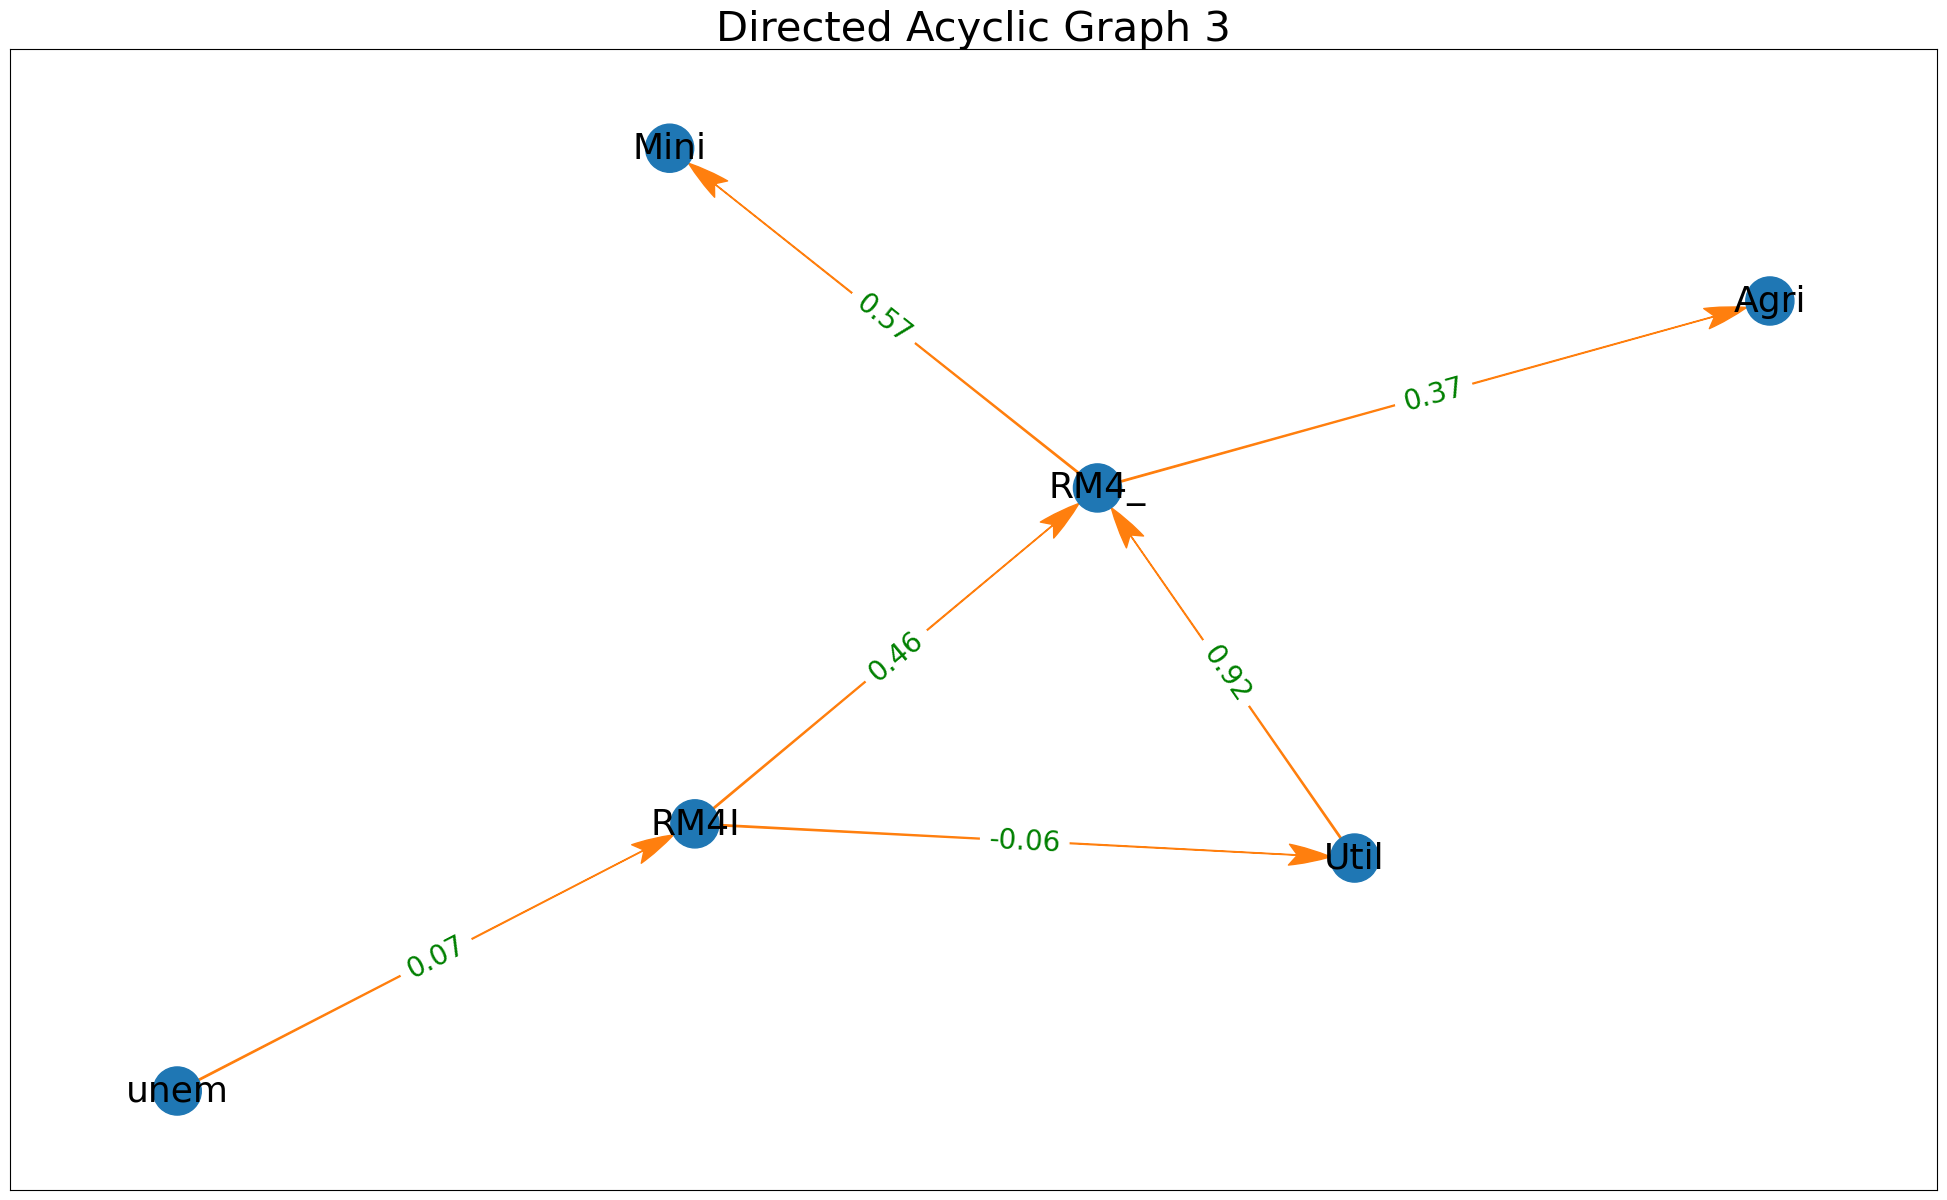

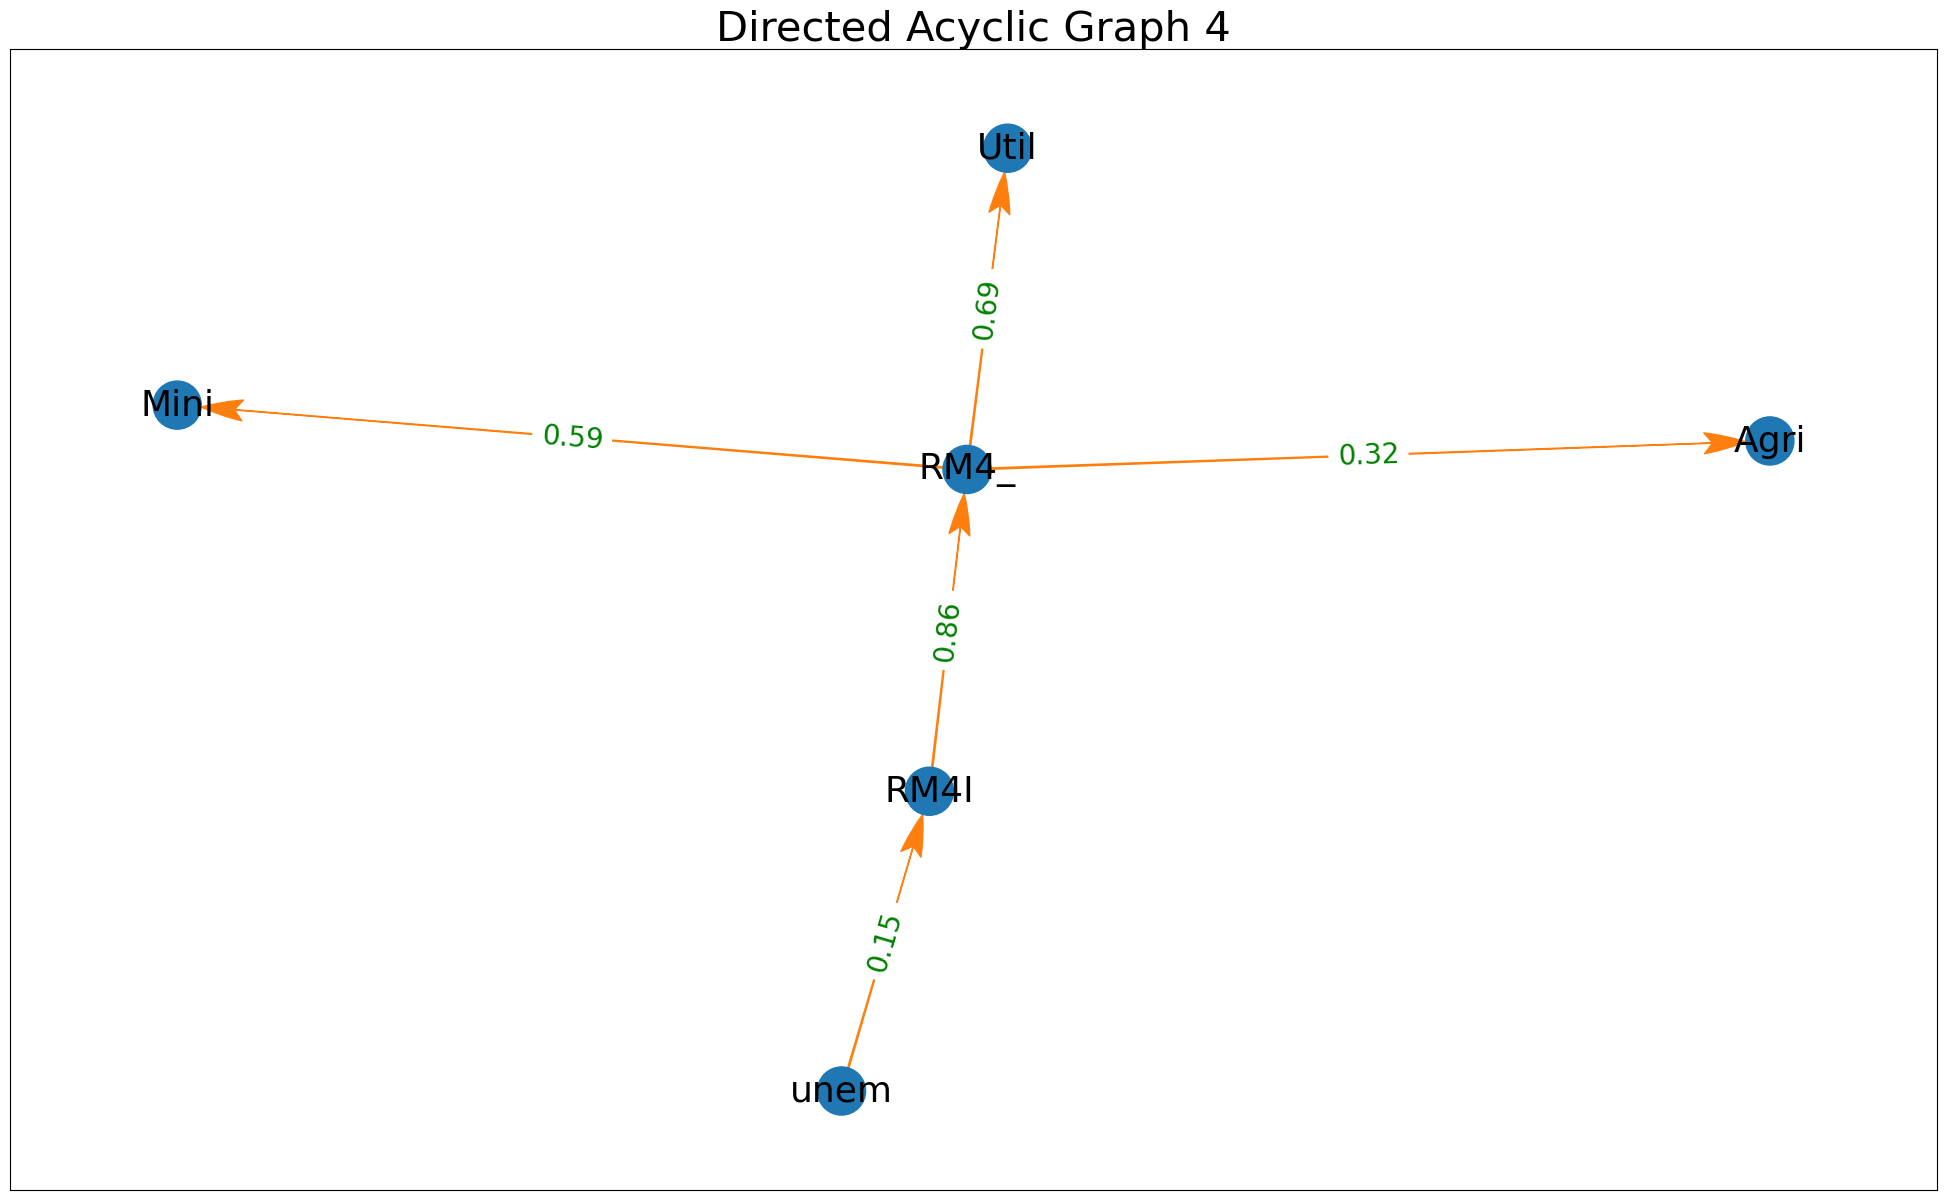

In [76]:
# Initialize a PdfPages object to save the plots in a PDF
pp = PdfPages("DAGs_nominal vs real.pdf")

# Plot DAGs for each dataframe
for i, plot_df in enumerate([plot_df1, plot_df2, plot_df3, plot_df4]):
    c = PC(plot_df)
    max_cond_vars = len(plot_df.keys()) - 2
    model = c.estimate(return_type='pdag', variant='parallel', significance_level=0.01,
                       max_cond_vars=max_cond_vars, ci_test='pearsonr')
    edges = model.edges

    # Plot the DAG
    graph_DAG(edges, plot_df, title=f'Directed Acyclic Graph {i+1}')
    
    # Save the plot to the PDF
    pp.savefig()

# Close the PdfPages object
pp.close()


In [ ]:
# List of dataframes
dataframes = [kml3d_ai_level11, kml3d_ai_level12, kml3d_ai_level21, kml3d_ai_level22]

# List of p-values for each dataframe
p_values_list = [0.1, 0.05, 0.01, 0.001]  # Updated to include p-values for each dataframe

# Define names for the output files based on dataframes
output_names = [f'clusters_b{i+1}' for i in range(len(dataframes))]

In [78]:
def create_cluster_dags(df):
    grouped = df.groupby('clusters')

    # Initialize an empty dictionary to store the DataFrames for each cluster
    cluster_dataframes = {}

    # Iterate over the groups and create DataFrames for each cluster
    for cluster, group in grouped:
        cluster_dataframes[cluster] = group.drop(['clusters'], axis=1)

    # List of DataFrames for each cluster
    cluster_dataframes_list = [cluster_dataframes[i] for i in range(1, 5)]  # Assuming four clusters

    return cluster_dataframes_list

def determine_p_value(n):
    # If the number of observations is 800 and above, use a p-value of 0.05, otherwise use 0.10
    return 0.05 if n >= 800 else 0.1

def graph_DAG_cluster(edges, df, title="", algorithm="parallel", ax=None, sig_vals=[0.05, 0.01, 0.001], pp=None):
    graph = nx.DiGraph()

    def build_edge_labels(edges, df, sig_vals):
        edge_labels = {}
        for edge in edges:
            controls = [key for key in df.keys() if key not in edge]
            controls = list(set(controls))
            keep_controls = []
            for control in controls:
                control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
                if (control, edge[1]) in control_edges:
                    keep_controls.append(control)

            pcorr = df.partial_corr(x=edge[0], y=edge[1], covar=keep_controls, method="pearson")
            label = str(round(pcorr["r"][0], 2))
            pvalue = pcorr["p-val"][0]

            for sig_val in sig_vals:
                if pvalue < sig_val:
                    label = label + "*"

            edge_labels[edge] = label
        return edge_labels

    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 12))

    graph.add_edges_from(edges)
    color_map = ["grey" for g in graph]

    graph.nodes()
    plt.tight_layout()
    pos = graphviz_layout(graph)

    edge_labels = build_edge_labels(edges, df, sig_vals=sig_vals)

    edge_labels2 = []
    for u, v, d in graph.edges(data=True):
        if pos[u][0] > pos[v][0]:
            if (v, u) in edge_labels.keys():
                edge_labels2.append(((u, v,), f'{edge_labels[u, v]}\n\n\n{edge_labels[(v, u)]}'))
        if (v, u) not in edge_labels.keys():
            edge_labels2.append(((u, v,), f'{edge_labels[(u, v)]}'))
    edge_labels = dict(edge_labels2)

    nx.draw_networkx(graph, pos, node_color=color_map, node_size=2500,
                     with_labels=True, arrows=True,
                     font_color="black",
                     font_size=26, alpha=1,
                     width=1, edge_color="C1",
                     arrowstyle="Fancy, head_length=3, head_width=1.5, tail_width=.1",
                     connectionstyle='arc3, rad = 0.05',
                     ax=ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos=pos,
                                 edge_labels=edge_labels,
                                 font_color='green',
                                 font_size=20,
                                 ax=ax)

    # Add title to the DAG
    ax.set_title(title)

    # Save to PDF if a PdfPages object is provided
    if pp:
        pp.savefig(ax.figure, bbox_inches='tight')



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

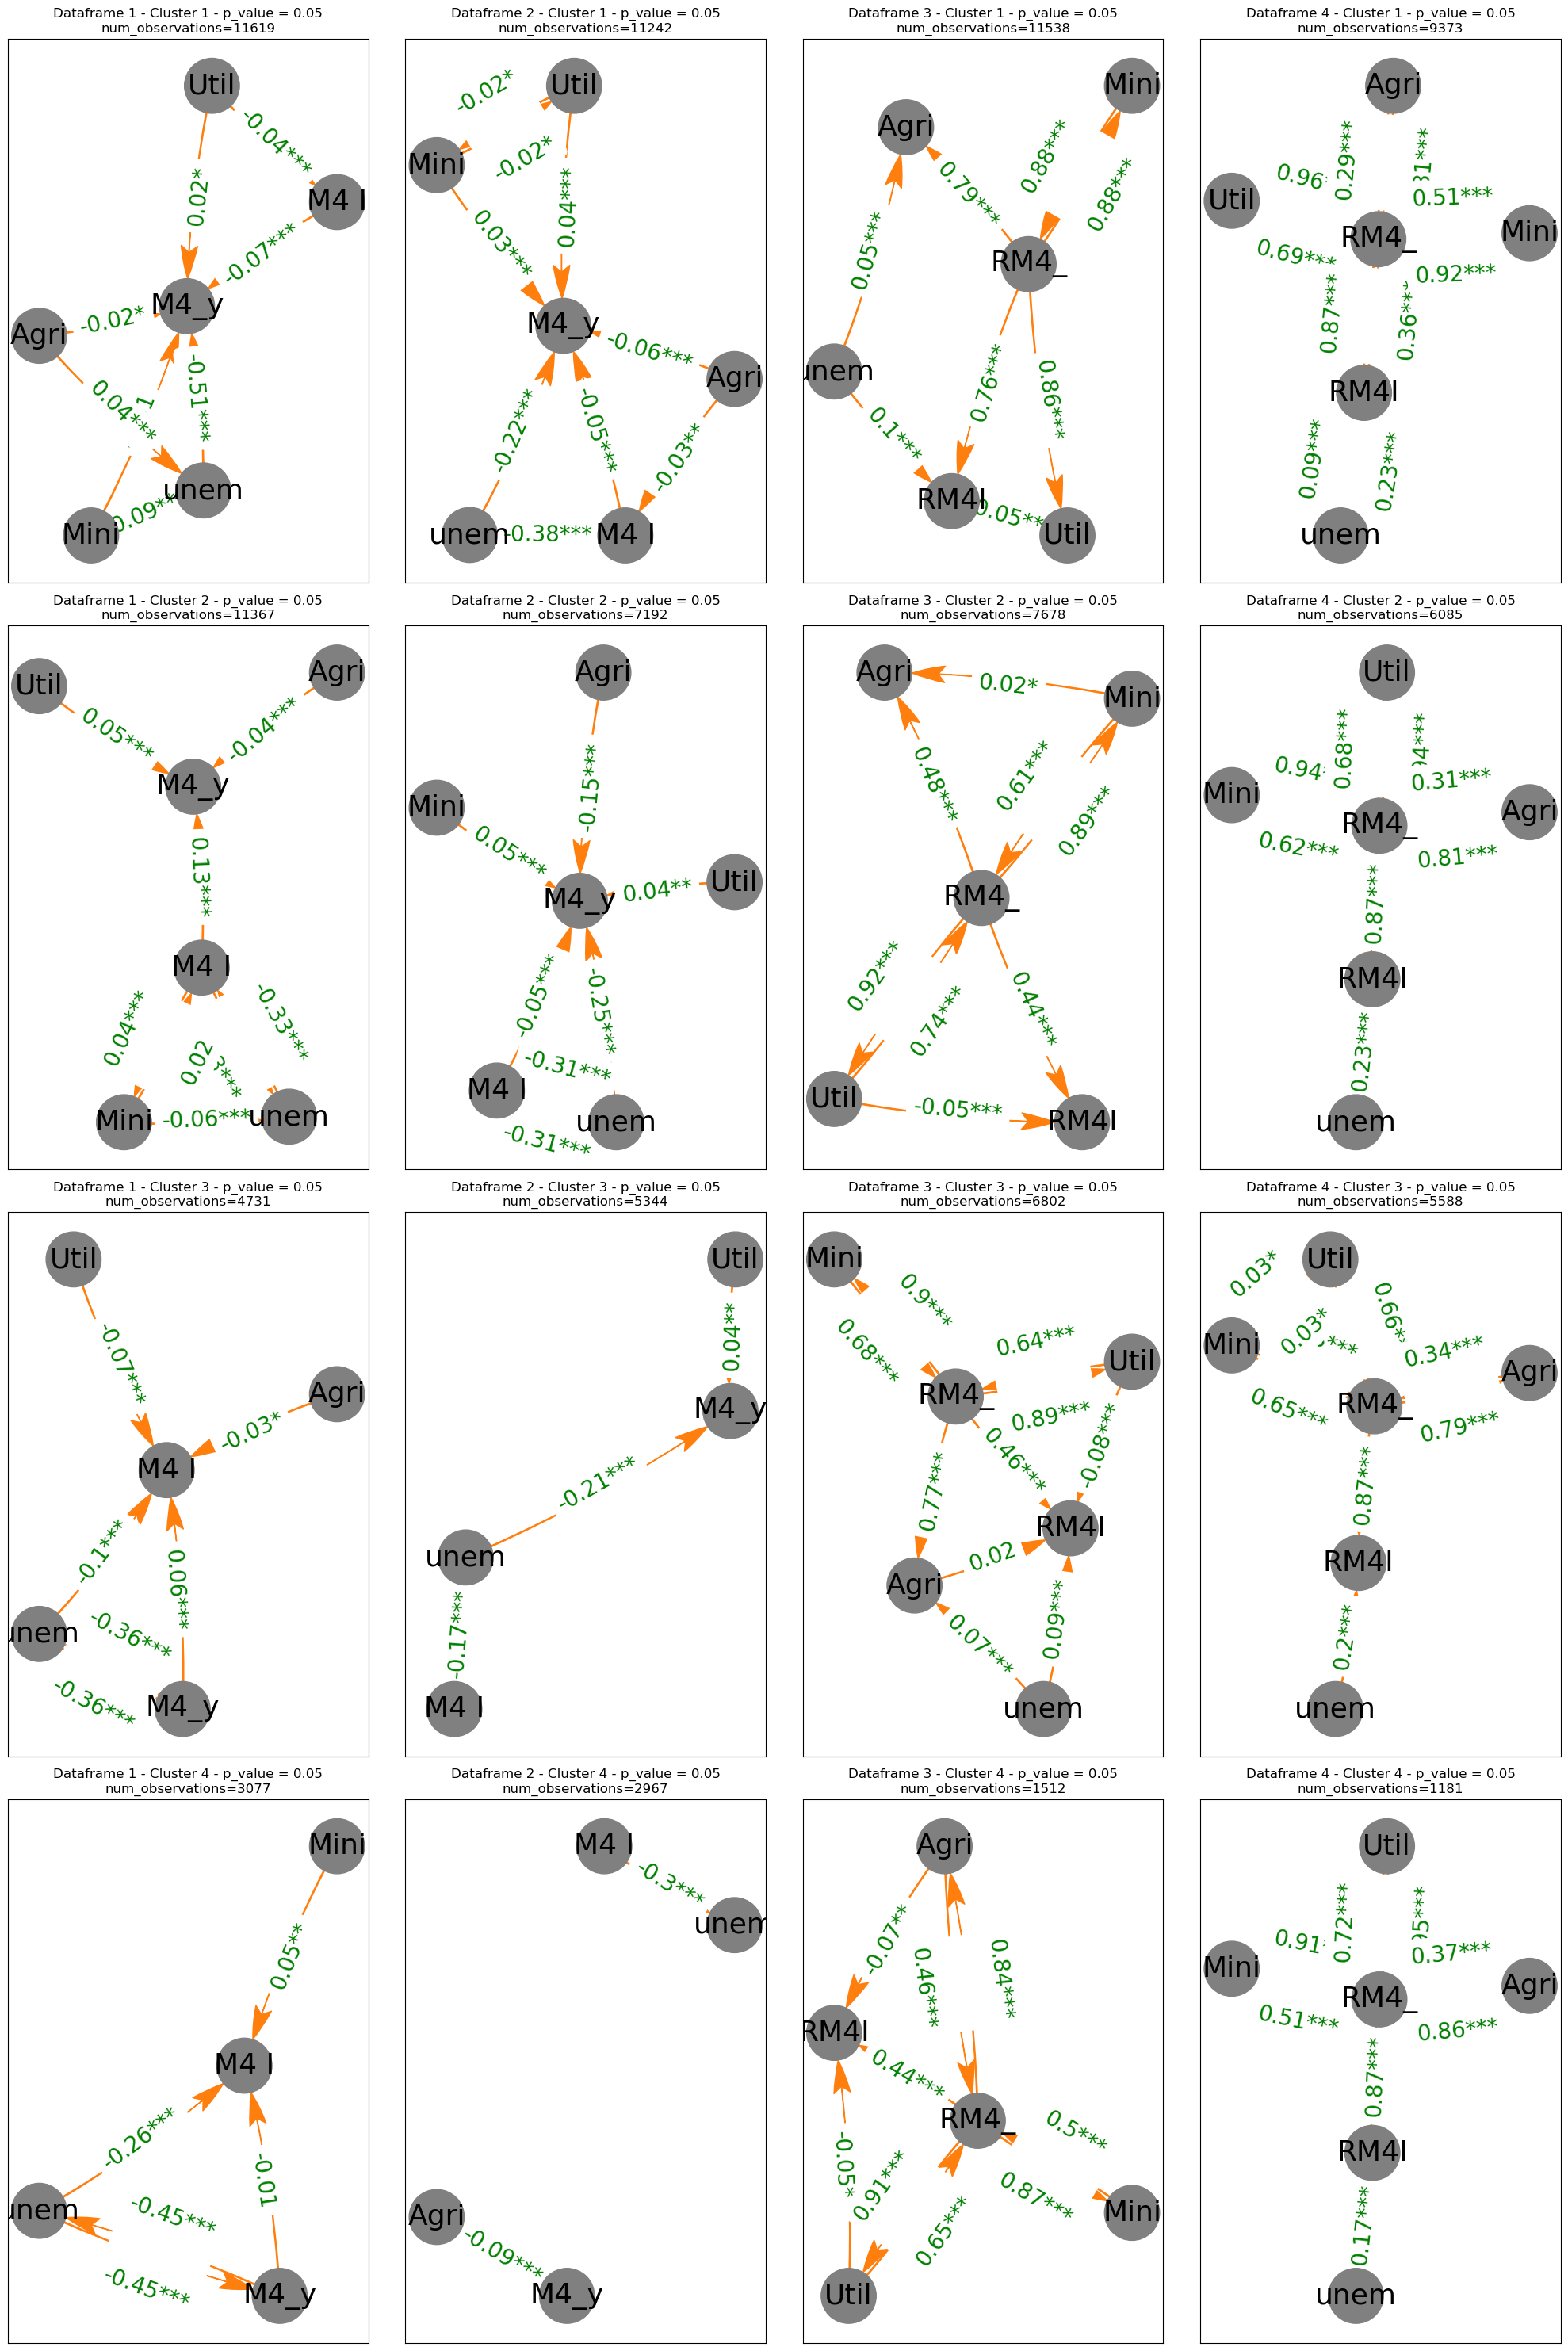

In [79]:
# Specify the absolute path for the output PDF file
pdf_file_path = f"DAGOutputs_{len(dataframes)}_dataframes.pdf"
pp = PdfPages(pdf_file_path)

# Create a grid for the subplots
fig, axes = plt.subplots(4, len(dataframes), figsize=(5*len(dataframes), 30))

# Different PC algorithms to test
algorithms = ["orig"]

# Iterate over each dataframe
for idx, dataframe in enumerate(dataframes):
    # Get clustered dataframes for the current dataframe
    clustered_dfs = create_cluster_dags(dataframe)

    # Iterate over clustered dataframes and determine p-values dynamically
    for cluster_idx, cluster_df in enumerate(clustered_dfs):
        n = cluster_df.shape[0]  # Number of observations for the current cluster
        p_value = determine_p_value(n)

        # Iterate over different PC algorithms
        for algorithm in algorithms:
            c = PC(cluster_df)
            model = c.estimate(return_type='pdag', variant=algorithm, significance_level=p_value, ci_test='pearsonr')
            edges = model.edges

            # Create DAG for the current cluster, p-value, and algorithm using the modified graph_DAG function
            graph_DAG_cluster(edges, cluster_df, title=f'Dataframe {idx + 1} - Cluster {cluster_idx + 1} - p_value = {p_value}\nnum_observations={n}'
                      , algorithm=algorithm, ax=axes[cluster_idx, idx], pp=pp)

# Save the figure to the PDF
pp.savefig(fig, bbox_inches='tight')

pp.close()
plt.show()

In [84]:
def get_edges_dict(dataframes):
    edges_dct = {}
    for idx, dataframe in enumerate(dataframes):
        # Get clustered dataframes for the current dataframe
        clustered_dfs = create_cluster_dags(dataframe)
        edges_dct[idx] = {}
        # Iterate over clustered dataframes and determine p-values dynamically
        for cluster_idx, cluster_df in enumerate(clustered_dfs):
            n = cluster_df.shape[0]  # Number of observations for the current cluster
            p_value = determine_p_value(n)

            # Iterate over different data for PC algorithm
            algorithm = "orig"
            c = PC(cluster_df)
            model = c.estimate(return_type='pdag', variant=algorithm, significance_level=p_value, ci_test='pearsonr')
            edges = model.edges
            edges = list(set([tuple(sorted(edge)) for edge in edges]))
            edges_dct[idx][cluster_idx] = edges
    return edges_dct


In [85]:
# Usage
edges_dct = get_edges_dict(dataframes)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [87]:
def get_col_shared_edges(edges_dct):
    cols = list(edges_dct.keys())
    rows = list(edges_dct[0].keys())

    col_shared_edges = {}
    row_shared_edges = {}
    for col in cols:
        for row, edges in edges_dct[col].items():
            if row == 0: col_shared_edges[col] = copy.copy(edges)
            col_shared_edges[col]  = [edge for edge in edges if edge in col_shared_edges[col] ]

    return col_shared_edges


In [88]:
# Usage
col_shared_edges = get_col_shared_edges(edges_dct)

In [89]:
col_shared_edges

{0: [('M4 I', 'M4_y')],
 1: [('M4 I', 'unem')],
 2: [('RM4_', 'Util'),
  ('Agri', 'RM4_'),
  ('Mini', 'RM4_'),
  ('RM4I', 'Util'),
  ('RM4I', 'RM4_')],
 3: [('RM4_', 'Util'),
  ('Agri', 'RM4_'),
  ('Mini', 'RM4_'),
  ('RM4I', 'unem'),
  ('RM4I', 'RM4_')]}

In [90]:
def get_row_shared_edges(edges_dct):
    cols = list(edges_dct.keys())
    rows = list(edges_dct[0].keys())

    row_shared_edges = {}
    for row in rows:
        row_shared_edges[row] = {}
        for col in cols:
            if col == 0: row_shared_edges[row] = edges_dct[col][row]
            row_shared_edges[row] = [edge for edge in edges_dct[col][row] if edge in row_shared_edges[row]]

    return row_shared_edges


In [91]:
# Usage
row_shared_edges = get_row_shared_edges(edges_dct)

In [92]:
row_shared_edges

{0: [], 1: [], 2: [], 3: []}

In [96]:
def plot_shared_edges(shared_edges):
    for key, lst in shared_edges.items():
        fig, ax = plt.subplots(figsize=(6, 6))
        G = nx.from_edgelist(lst)
        color_map = ["grey" for _ in G]
        plt.tight_layout()
        pos = graphviz_layout(G)
        nx.draw_networkx(G, pos, node_color=color_map, node_size=2500,
                         font_color="black",
                         font_size=26, alpha=1,
                         width=1, edge_color="C1",
                         connectionstyle='arc3, rad = 0.05',
                         ax=ax)
    plt.show()


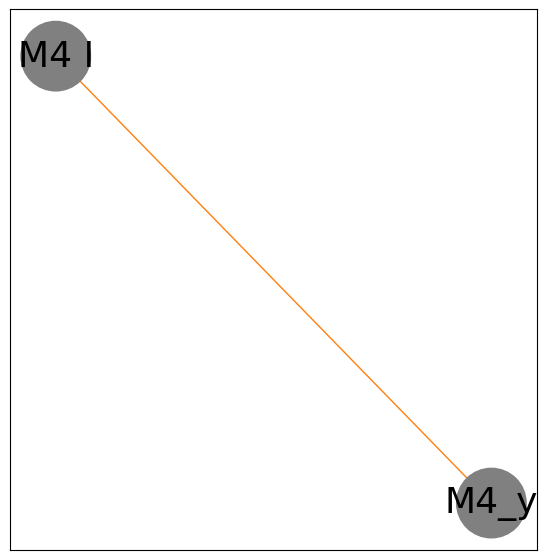

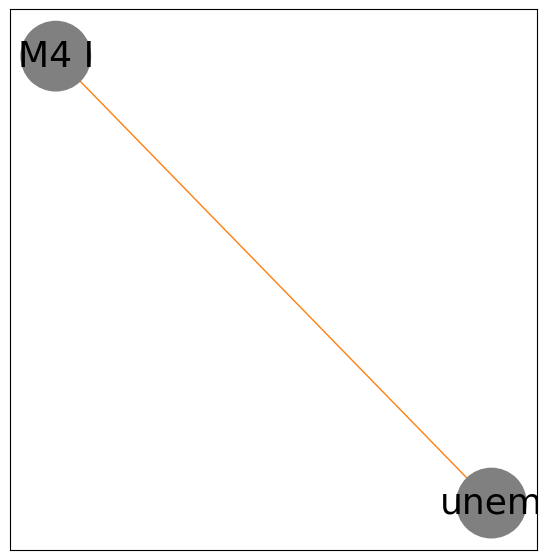

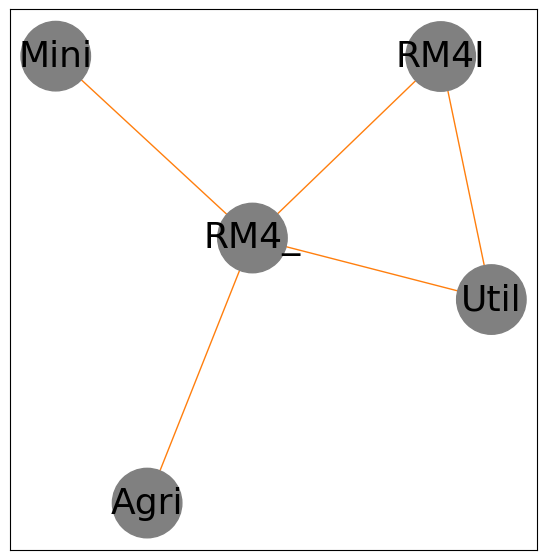

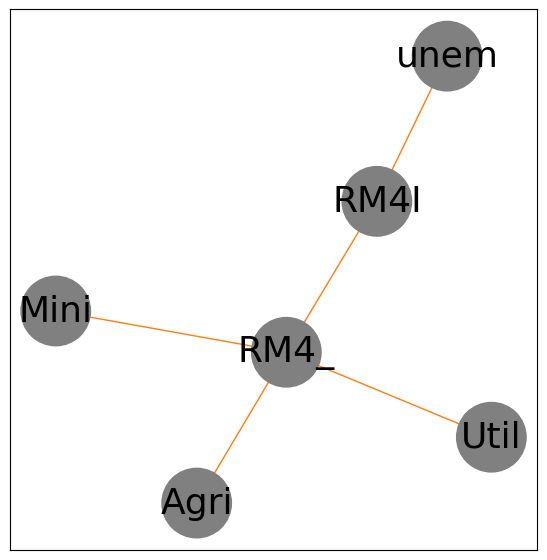

In [97]:
# Usage
plot_shared_edges(col_shared_edges)